# 타이타닉 생존자 예측
## 데이터 전처리

In [3]:
# 앞으로 쓸 헤더파일들 미리 선언
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
titanic_df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220312\titanic\train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


데이터 살펴보기(pandas) -> 데이터 파일 불러오기, 전체 보여주기

In [4]:
print("titanic 변수 type :", type(titanic_df))
titanic_df

titanic 변수 type : <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


데이터 살펴보기(pandas) -> data의 크기

In [7]:
print("DataFrame 크기 :", titanic_df.shape)

DataFrame 크기 : (891, 12)


데이터 자세히 보기 : info(), describe()

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터 살펴보기(pandas) Null값 처리

In [11]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# sum() 두번 - 전체 데이터에 대한 Null값이 있는지 확인
print("데이터 세트 Null값 갯수", titanic_df.isnull().sum().sum())

데이터 세트 Null값 갯수 0


In [13]:
# sum() 한번 - 필드별로 Null이 있는지 확인
print("데이터 세트 Null값 갯수", titanic_df.isnull().sum())

데이터 세트 Null값 갯수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


데이터 살펴보기(pandas) 문자 속성값 처리

In [14]:
print("Sex 값 분포 :\n", titanic_df['Sex'].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df['Cabin'].value_counts())
print("\n Embarked 값 분포 :\n", titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
C101             1
C111             1
D46              1
B73              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [15]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]    # 첫 글자만
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


데이터 살펴보기(pandas) value_counts()

In [17]:
# series 타입 출력
titanic_pclass = titanic_df['Pclass']
type(titanic_pclass)

pandas.core.series.Series

In [18]:
titanic_pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [19]:
# 갯수 확인
value_counts = titanic_df['Pclass'].value_counts()
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
# 탑승한 남성과 여성의 비율은
titanic_df.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

통계를 통한 주요 피처 검증

In [22]:
# 성별에 따른 생존 결과
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

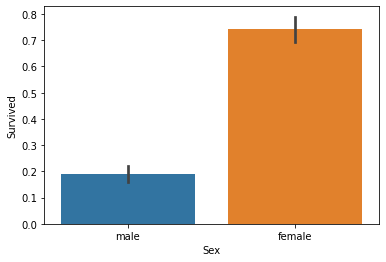

In [23]:
# 그래프로 시각화
# barplot : 막대 그래프로 출력
sns.barplot(x = 'Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

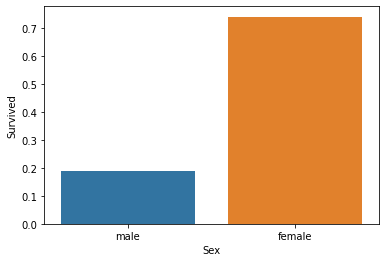

In [24]:
# 그래프에 꼬다리? 사라짐
sns.barplot(x = 'Sex', y = 'Survived', data=titanic_df, ci=None)

In [25]:
# 생존여부 결과
titanic_df.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [26]:
# 선실 등급에 따른 생존 결과
titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [28]:
# 성별에 따른 생존 결과
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [29]:
# 나이에 따른 생존 결과
titanic_df.groupby(['Age', 'Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 144, dtype: int64

시각화를 통한 주요 피처 검증

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

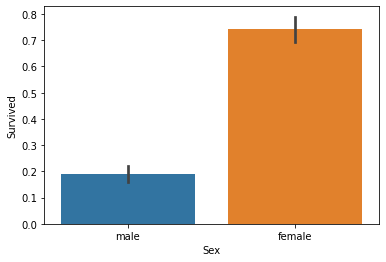

In [30]:
# 성별에 따른 생존
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

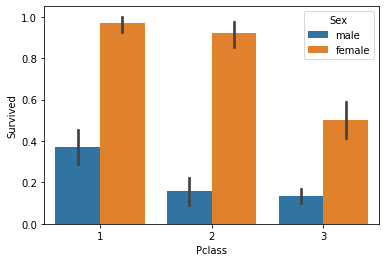

In [35]:
# 빈부격차에 따른 생존(hue를 이용해 성별로도 나눠준다)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

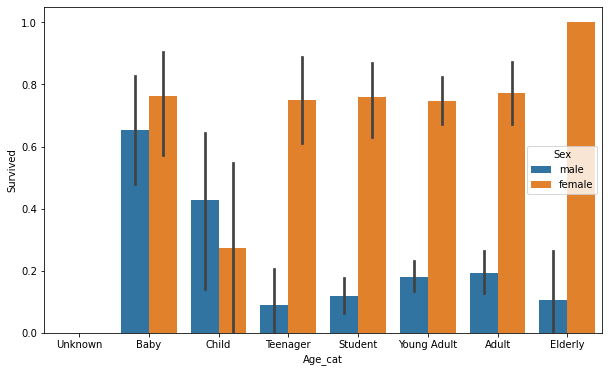

In [37]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
# DataFrame의 apply lambda식에 사용
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
# get_category(x)는 입력값과 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

피처 엔코딩

In [42]:
# feature encoding : Label encoding
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [45]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
# 머신러닝 알고리즘이 불필요한 속성 제거
def drop_feautures(df):
    dr.drop(['Passengerld', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [47]:
# 강사님거 복사 코드
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


## 테스트 데이터 세트 추출
학습 시작

In [48]:
# 테스트 데이터 세트 크기는 전체의 20%
from sklearn.preprocessing import LabelEncoder

# 원본 데이터를 재로딩하고 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220312\titanic\train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_titanic_df)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

머신러닝 모델 학습/예측/평가

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print("DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print("RandomForestClassifier 정확도 : {0:.4f}".format(accuracy_score(y_test, rf_pred)))
      
# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print("LogisticRegression : {0:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression : 0.8492


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 교차 검증 수행

In [58]:
# 교차검증을 Kfold를 이용해 수행
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(x_train, y_train) 
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [57]:
# 교차검증을 cross_val_score() API를 이용해 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [62]:
# 교차검증을 GridSearchCV를 이용해 수행
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score   # 정밀도(precision)
from sklearn.metrics import recall_score    # 재현율(recall)

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
precision = precision_score(y_test, dpredictions)   # 정밀도(precision)
recall = recall_score(y_test, dpredictions)    # 재현율(recall)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

print("테스트 세트에서의 DecisionTreeClassifier 정밀도 : {0:.4f}".format(precision))   # 정밀도(precision)
print("테스트 세트에서의 DecisionTreeClassifier 재현율 : {0:.4f}".format(recall))    # 재현율(recall)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
테스트 세트에서의 DecisionTreeClassifier 정밀도 : 0.8393
테스트 세트에서의 DecisionTreeClassifier 재현율 : 0.7705


# 분류모델 지표의 의미와 계산법
정밀도 - 참이라고 예측했는데 정말 참인것
재현율 - 실제로 참인걸 참이라고 예측

TP - 모델이 예측한것은 True이고 실제로 True여서 맞춤
FP - 모델이 예측한것은 True이나 실제로는 False여서 틀림
TN - 모델이 예측한것은 False이고 실제로 False여서 맞춤
FN - 모델이 예측한것은 False이나 실제로는 True여서 틀림